In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')


In [4]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
X = dataset.iloc[:, [3, 4]].values

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

#Option input X can be used, directly or as scaled input..

In [49]:
from sklearn.cluster import AffinityPropagation

#clustering = AffinityPropagation(random_state=5)
clustering = AffinityPropagation(preference=-10).fit(x_scaled)
cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_

n_clusters = len(cluster_centers_indices)

print(f"Estimated number of clusters: {n_clusters}")


Estimated number of clusters: 6


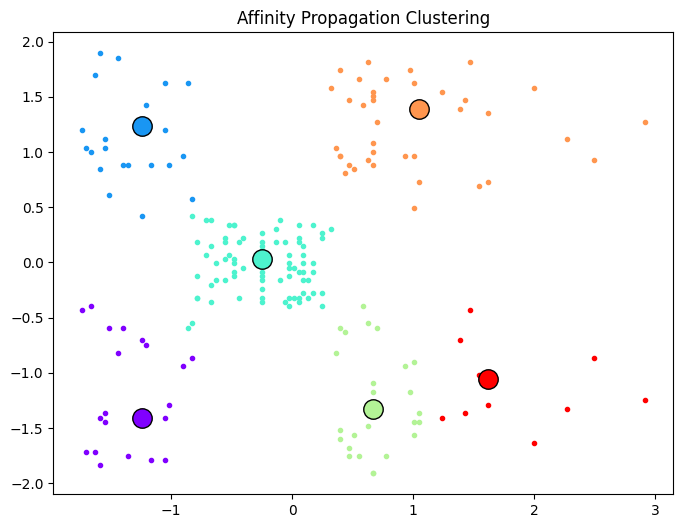

In [50]:
plt.figure(figsize=(8, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
for k, col in zip(range(n_clusters), colors):
    class_members = (labels == k)
    cluster_center = x_scaled[cluster_centers_indices[k]]
    plt.plot(x_scaled[class_members, 0], x_scaled[class_members, 1], '.', color=col)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Affinity Propagation Clustering')
plt.show()

In [51]:
unsupervised=pd.DataFrame(dataset)

In [52]:
unsupervised['Cluster_group']=labels

In [53]:
unsupervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,5
197,198,Male,32,126,74,4
198,199,Male,32,137,18,5


C:\Anaconda\anaconda3\envs\v_env1\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


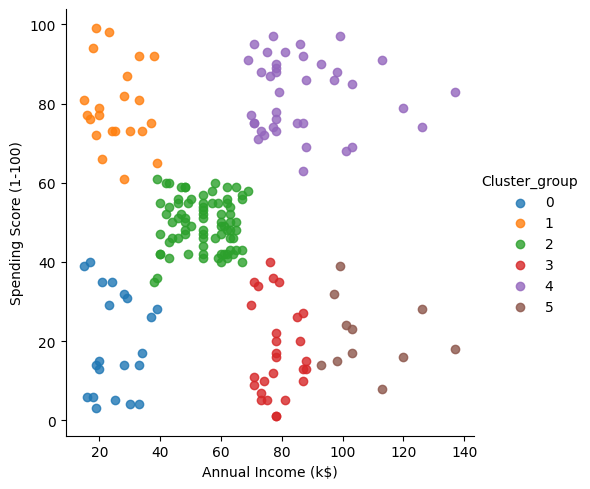

In [54]:
import seaborn as sns
facet = sns.lmplot(data=unsupervised, x=unsupervised.columns[3], y=unsupervised.columns[4], hue=unsupervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

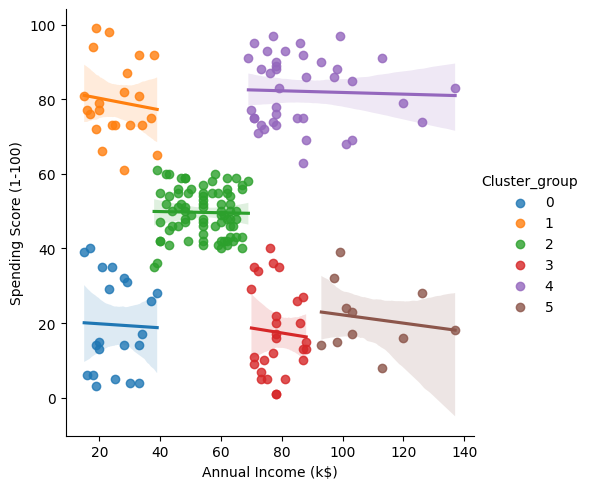

In [55]:
facet = sns.lmplot(data=unsupervised, x=unsupervised.columns[3], y=unsupervised.columns[4], hue=unsupervised.columns[5])

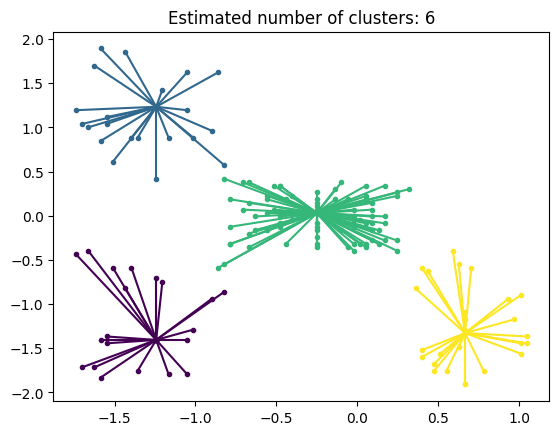

In [56]:
plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = x_scaled[cluster_centers_indices[k]]
    plt.scatter(
        x_scaled[class_members, 0], x_scaled[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in x_scaled[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters)
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

from sklearn.metrics import silhouette_score 
score = silhouette_score(x_scaled,labels)
print("Silhouette Score:" , score)

Silhouette Score: 0.5336383635674509


In [ ]:
#updated the code for checking the score
#updated scaled input for model creation and also for model score. 